In [7]:
# Initial imports
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import psycopg2
from sklearn import linear_model 
from sklearn.decomposition import PCA
import matplotlib. pyplot as plt
from config import password

In [2]:
# Load the pga data set dataset from database 
connection_string = f"host=red-team-final.c3yshvuxvm9x.us-east-2.rds.amazonaws.com dbname=red-team port=5432 user=postgres password={password}"
connection = psycopg2.connect(connection_string)

In [3]:
# Establish connection and db
sql = "select * from pga_stats"
pga_df = pd.read_sql(sql, connection)
pga_df.head()

,SG_off_tee_AVERAGE,SG_tee_green_AVERAGE,driving_dist_AVG.,pct_ydg_tee_AVG (%),driving_320+_%,SG_approach_green_AVERAGE,GIR_pct_%,GOFIR_pct_%,GIR_pct_fwy_%,GIR_pct_not_fwy_%,...,pct_sand_save_%,scrambling_%,SG_putt_AVERAGE,pct_one_putt_%,pct_three_putt_avoid_%,putt_avg_AVG,putts_per_rd_AVG,bogey_avoid_% MAKES BOGEY,btb_ratio_BIRDIE TO BOGEY RATIO,money_MONEY
0,1.144,2.099,321.1,66.80,51.47,0.696,66.67,80.34,80.87,50.25,...,48.89,61.27,0.435,41.01,3.27,1.752,28.74,14.54,1.84,5443091
1,0.841,1.700,307.1,64.01,29.17,0.582,72.11,85.90,83.80,57.32,...,50.00,63.07,-0.019,38.43,2.55,1.750,29.04,14.00,1.79,3556232
2,0.774,1.064,318.2,64.96,48.68,0.178,65.35,74.37,79.47,53.10,...,57.35,57.81,0.040,42.11,3.36,1.743,28.76,17.11,1.48,1782342
3,0.610,0.833,299.9,63.64,13.28,0.553,73.18,79.81,80.52,65.29,...,46.05,61.49,-0.013,37.67,2.52,1.756,29.30,12.50,1.91,1482028
4,0.567,0.563,287.4,60.36,8.33,-0.088,64.81,68.25,72.54,51.09,...,52.50,60.53,-0.793,39.12,2.78,1.779,29.25,15.74,1.15,164271


In [4]:
# Define the features set as everything but money 
X = pga_df.copy()
X = X.drop("money_MONEY", axis=1)
X.head()

,SG_off_tee_AVERAGE,SG_tee_green_AVERAGE,driving_dist_AVG.,pct_ydg_tee_AVG (%),driving_320+_%,SG_approach_green_AVERAGE,GIR_pct_%,GOFIR_pct_%,GIR_pct_fwy_%,GIR_pct_not_fwy_%,...,SG_ATG_AVERAGE,pct_sand_save_%,scrambling_%,SG_putt_AVERAGE,pct_one_putt_%,pct_three_putt_avoid_%,putt_avg_AVG,putts_per_rd_AVG,bogey_avoid_% MAKES BOGEY,btb_ratio_BIRDIE TO BOGEY RATIO
0,1.144,2.099,321.1,66.80,51.47,0.696,66.67,80.34,80.87,50.25,...,0.259,48.89,61.27,0.435,41.01,3.27,1.752,28.74,14.54,1.84
1,0.841,1.700,307.1,64.01,29.17,0.582,72.11,85.90,83.80,57.32,...,0.326,50.00,63.07,-0.019,38.43,2.55,1.750,29.04,14.00,1.79
2,0.774,1.064,318.2,64.96,48.68,0.178,65.35,74.37,79.47,53.10,...,0.112,57.35,57.81,0.040,42.11,3.36,1.743,28.76,17.11,1.48
3,0.610,0.833,299.9,63.64,13.28,0.553,73.18,79.81,80.52,65.29,...,-0.329,46.05,61.49,-0.013,37.67,2.52,1.756,29.30,12.50,1.91
4,0.567,0.563,287.4,60.36,8.33,-0.088,64.81,68.25,72.54,51.09,...,0.084,52.50,60.53,-0.793,39.12,2.78,1.779,29.25,15.74,1.15


In [5]:
# Define the target set as Money/ Earning PGA
y = pga_df["money_MONEY"].ravel()
y[:5]

array([5443091, 3556232, 1782342, 1482028,  164271], dtype=int64)

In [8]:
# Split Data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
# Call Linear Regression model
model = linear_model.LinearRegression()

## train data to model 
model.fit(X_train, y_train)

## test data on model 
predicted = model.predict(X_test)

#importances??? unsure why linear model will work here but not importances 
importances = model.feature_importances_

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

TypeError: '(slice(None, None, None), 0)' is an invalid key

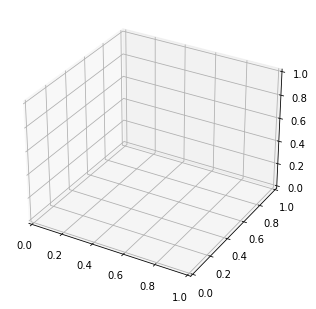

In [10]:
## PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)
## train 2d model
model_2d = linear_model.LinearRegression()
model_2d.fit(X_train, y_train)
## plot regression plane
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())
ax.scatter(X_test[:,0], X_test[:,1], y_test, color="black")
X1 = np.array([[X_test.min(), X_test.min()], [X_test.max(), 
               X_test.max()]])
X2 = np.array([[X_test.min(), X_test.max()], [X_test.min(), 
               X_test.max()]])
Y = model_2d.predict(np.array([[X_test.min(), X_test.min(), 
                     X_test.max(), X_test.max()], 
                    [X_test.min(), X_test.max(), X_test.min(), 
                     X_test.max()]]).T).reshape((2,2))
Y = scalerY.inverse_transform(Y)
ax.plot_surface(X1, X2, Y, alpha=0.5)
ax.set(zlabel="Y", title="Regression plane", xticklabels=[], 
       yticklabels=[])
plt.show()